<a href="https://colab.research.google.com/github/MerlinePricillaPeter/LUNG-CANCER-PREDICTION/blob/main/LUNG_CANCER_PREDICTION.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [46]:
!pip install imbalanced-learn


In [47]:
# import all libraries needed
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder, MinMaxScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report, ConfusionMatrixDisplay
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
import xgboost as xgb
from xgboost import XGBClassifier
from imblearn.over_sampling import SMOTE
from sklearn.tree import DecisionTreeClassifier
from sklearn.inspection import permutation_importance
import warnings



In [48]:

# to Ignore all warnings
warnings.filterwarnings("ignore")

In [49]:
 #Specifying the file path
data = '/content/survey lung cancer.csv'

#to  Read the CSV file into a DataFrame
df = pd.read_csv(data)

# to Display the first few rows from the  dataset
print(df.head())

  GENDER  AGE  SMOKING  YELLOW_FINGERS  ANXIETY  PEER_PRESSURE  \
0      M   69        1               2        2              1   
1      M   74        2               1        1              1   
2      F   59        1               1        1              2   
3      M   63        2               2        2              1   
4      F   63        1               2        1              1   

   CHRONIC DISEASE  FATIGUE   ALLERGY   WHEEZING  ALCOHOL CONSUMING  COUGHING  \
0                1         2         1         2                  2         2   
1                2         2         2         1                  1         1   
2                1         2         1         2                  1         2   
3                1         1         1         1                  2         1   
4                1         1         1         2                  1         2   

   SHORTNESS OF BREATH  SWALLOWING DIFFICULTY  CHEST PAIN LUNG_CANCER  
0                    2                      

In [50]:
# Display the column names
print(df.columns)

Index(['GENDER', 'AGE', 'SMOKING', 'YELLOW_FINGERS', 'ANXIETY',
       'PEER_PRESSURE', 'CHRONIC DISEASE', 'FATIGUE ', 'ALLERGY ', 'WHEEZING',
       'ALCOHOL CONSUMING', 'COUGHING', 'SHORTNESS OF BREATH',
       'SWALLOWING DIFFICULTY', 'CHEST PAIN', 'LUNG_CANCER'],
      dtype='object')


In [51]:
# to find the missing values from the  dataset
print("Data Types and Missing Values:")
print(df.info())

Data Types and Missing Values:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309 entries, 0 to 308
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   GENDER                 309 non-null    object
 1   AGE                    309 non-null    int64 
 2   SMOKING                309 non-null    int64 
 3   YELLOW_FINGERS         309 non-null    int64 
 4   ANXIETY                309 non-null    int64 
 5   PEER_PRESSURE          309 non-null    int64 
 6   CHRONIC DISEASE        309 non-null    int64 
 7   FATIGUE                309 non-null    int64 
 8   ALLERGY                309 non-null    int64 
 9   WHEEZING               309 non-null    int64 
 10  ALCOHOL CONSUMING      309 non-null    int64 
 11  COUGHING               309 non-null    int64 
 12  SHORTNESS OF BREATH    309 non-null    int64 
 13  SWALLOWING DIFFICULTY  309 non-null    int64 
 14  CHEST PAIN             309 non-null    int6

In [52]:
# Display the shape of the dataset
print("Dataset Shape:")
print(f"Rows: {df.shape[0]}, Columns: {df.shape[1]}")

Dataset Shape:
Rows: 309, Columns: 16


In [53]:
#to check the missing values
print("\nMissing Values:")
print(df.isnull().sum())


Missing Values:
GENDER                   0
AGE                      0
SMOKING                  0
YELLOW_FINGERS           0
ANXIETY                  0
PEER_PRESSURE            0
CHRONIC DISEASE          0
FATIGUE                  0
ALLERGY                  0
WHEEZING                 0
ALCOHOL CONSUMING        0
COUGHING                 0
SHORTNESS OF BREATH      0
SWALLOWING DIFFICULTY    0
CHEST PAIN               0
LUNG_CANCER              0
dtype: int64


In [54]:
#  Remove duplicates
print("\nDuplicate rows: ", df.duplicated().sum())
dataset = df.drop_duplicates()


Duplicate rows:  33


In [55]:
df = df.drop_duplicates()

In [56]:
# Clean column names by stripping spaces
df.columns = df.columns.str.strip()


In [57]:
# Display the shape of the dataset
print("Dataset Shape after pre-processing:")
print(f"Rows: {df.shape[0]}, Columns: {df.shape[1]}")

Dataset Shape after pre-processing:
Rows: 276, Columns: 16


**EXPLORATORY DATA ANALYSIS**

In [58]:
# Checking for unique values in each column from the dataset
print("\nUnique Values in Each Column:")
for column in df.columns:
    print(f"{column}: {df[column].unique()}")


Unique Values in Each Column:
GENDER: ['M' 'F']
AGE: [69 74 59 63 75 52 51 68 53 61 72 60 58 48 57 44 64 21 65 55 62 56 67 77
 70 54 49 73 47 71 66 76 78 81 79 38 39 87 46]
SMOKING: [1 2]
YELLOW_FINGERS: [2 1]
ANXIETY: [2 1]
PEER_PRESSURE: [1 2]
CHRONIC DISEASE: [1 2]
FATIGUE: [2 1]
ALLERGY: [1 2]
WHEEZING: [2 1]
ALCOHOL CONSUMING: [2 1]
COUGHING: [2 1]
SHORTNESS OF BREATH: [2 1]
SWALLOWING DIFFICULTY: [2 1]
CHEST PAIN: [2 1]
LUNG_CANCER: ['YES' 'NO']


In [59]:
#summarizing the statistical data
print("\nBasic Statistical Summary:")
print(df.describe())


Basic Statistical Summary:
              AGE     SMOKING  YELLOW_FINGERS     ANXIETY  PEER_PRESSURE  \
count  276.000000  276.000000      276.000000  276.000000     276.000000   
mean    62.909420    1.543478        1.576087    1.496377       1.507246   
std      8.379355    0.499011        0.495075    0.500895       0.500856   
min     21.000000    1.000000        1.000000    1.000000       1.000000   
25%     57.750000    1.000000        1.000000    1.000000       1.000000   
50%     62.500000    2.000000        2.000000    1.000000       2.000000   
75%     69.000000    2.000000        2.000000    2.000000       2.000000   
max     87.000000    2.000000        2.000000    2.000000       2.000000   

       CHRONIC DISEASE     FATIGUE     ALLERGY    WHEEZING  ALCOHOL CONSUMING  \
count       276.000000  276.000000  276.000000  276.000000         276.000000   
mean          1.521739    1.663043    1.547101    1.547101           1.550725   
std           0.500435    0.473529    0.4986

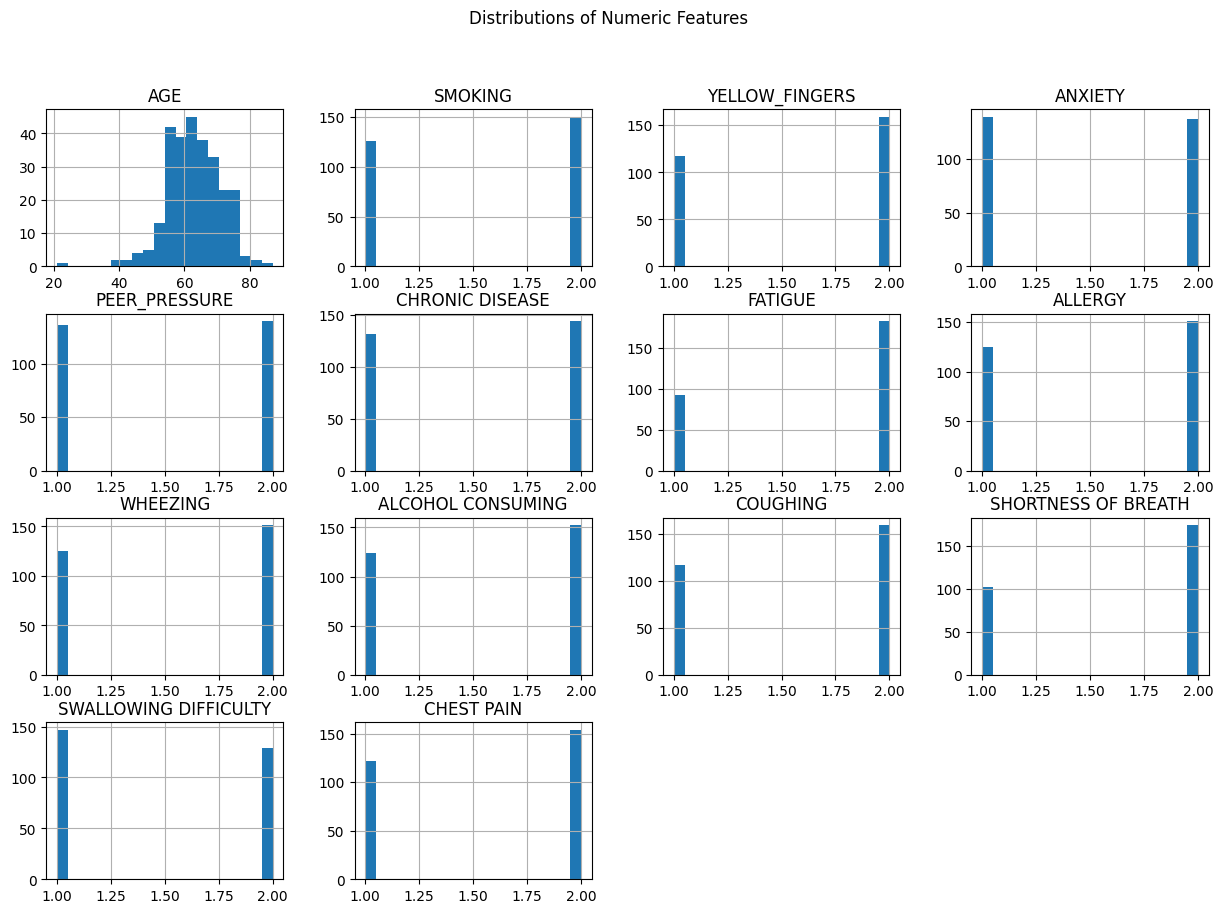

In [60]:
 # Visualizing the distributions of numeric features (LUNG CANCER HAS BEEN EXCLUDED AS IT IS OUR TARGET VARIABLE ))
numeric_columns = df.select_dtypes(include='number').columns
df[numeric_columns].hist(bins=20, figsize=(15, 10))
plt.suptitle("Distributions of Numeric Features")
plt.show()

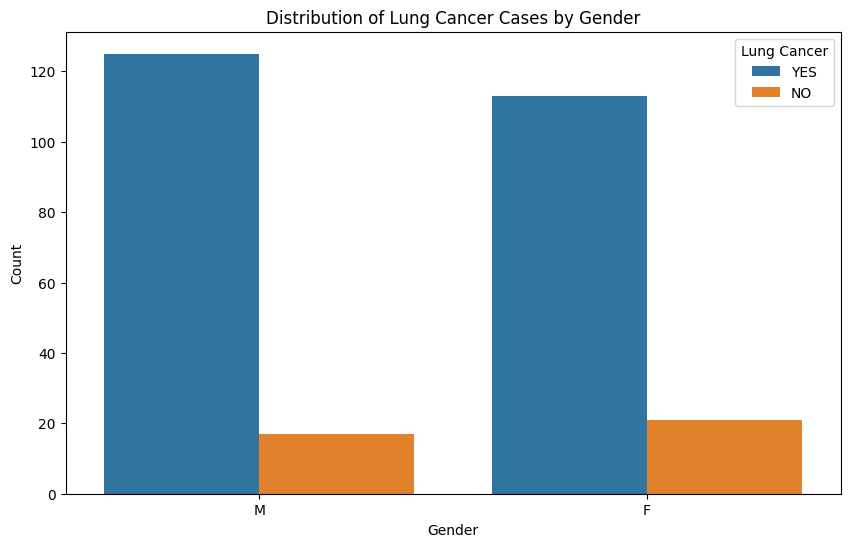

In [61]:
# plotting the Bar chart for gender distribution analysis
plt.figure(figsize=(10, 6))
sns.countplot(x='GENDER', hue='LUNG_CANCER', data=df)
plt.title('Distribution of Lung Cancer Cases by Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.legend(title='Lung Cancer', loc='upper right')
plt.show()


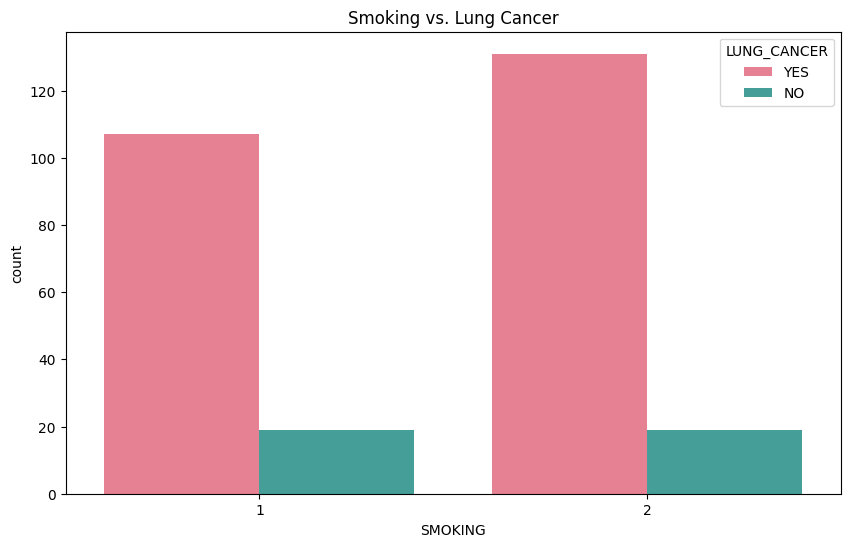

In [62]:
# Smoking vs Lung Cancer Distribution
plt.figure(figsize=(10, 6))
sns.countplot(x='SMOKING', hue='LUNG_CANCER', data=df, palette="husl")
plt.title("Smoking vs. Lung Cancer")
plt.show()

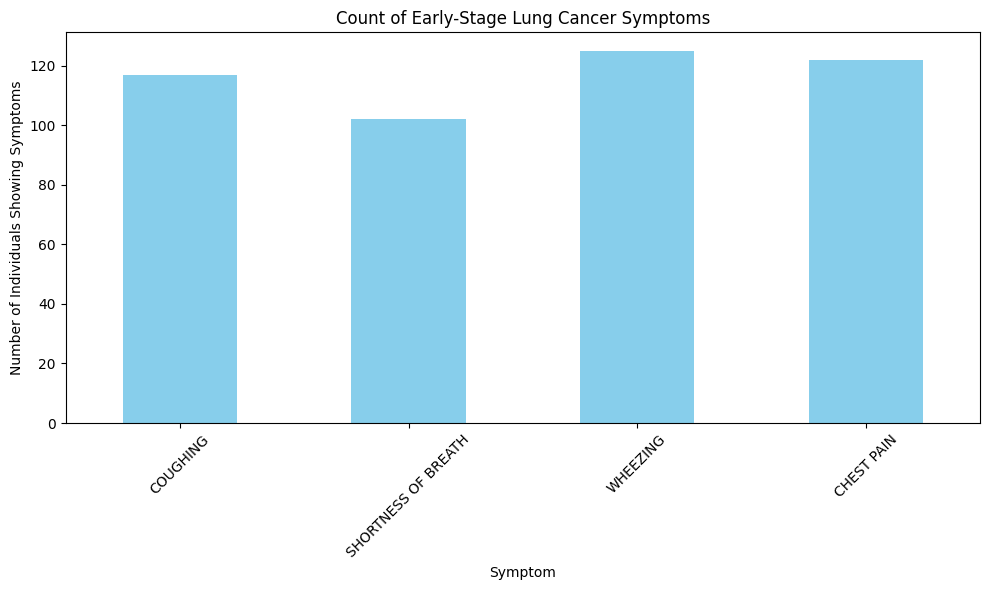

In [63]:
# Creating a new df for early stage symptoms
early_stage_symptoms = df[['COUGHING', 'SHORTNESS OF BREATH', 'WHEEZING', 'CHEST PAIN']]

# set conditions to binary
early_stage_symptoms = early_stage_symptoms.apply(lambda x: x == 1)

# Visualize the count of individuals
plt.figure(figsize=(10, 6))
early_stage_symptoms.sum().plot(kind='bar', color='skyblue')
plt.title("Count of Early-Stage Lung Cancer Symptoms")
plt.ylabel('Number of Individuals Showing Symptoms')
plt.xlabel('Symptom')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


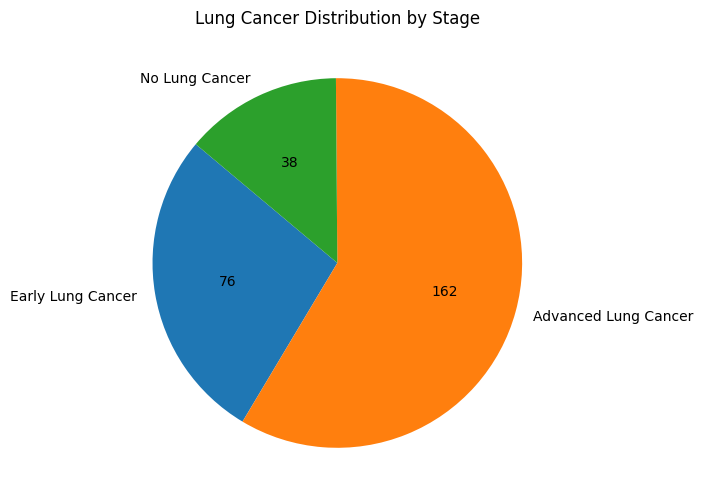

In [64]:
#calculate stages of lung cancer in people  from the data
lung_cancer_df = df[df['LUNG_CANCER'] == 'YES']

early_lung_cancer = lung_cancer_df[(lung_cancer_df['AGE'] < 60) &
                                  ((lung_cancer_df['FATIGUE'] >= 1) | (lung_cancer_df['WHEEZING'] >= 1))]

advanced_lung_cancer = lung_cancer_df[(lung_cancer_df['AGE'] >= 60) &
                                      ((lung_cancer_df['SHORTNESS OF BREATH'] >= 1) | (lung_cancer_df['CHEST PAIN'] >= 1))]

# Calculate counts
counts = {
    "Early Lung Cancer": early_lung_cancer.shape[0],
    "Advanced Lung Cancer": advanced_lung_cancer.shape[0],
    "No Lung Cancer": df[df['LUNG_CANCER'] == 'NO'].shape[0]
}

# Plot pie chart
plt.figure(figsize=(8, 6))
plt.pie(counts.values(), labels=counts.keys(),
        autopct=lambda pct: f"{int(round(pct/100. * sum(counts.values())))}", startangle=140)
plt.title('Lung Cancer Distribution by Stage')
plt.show()


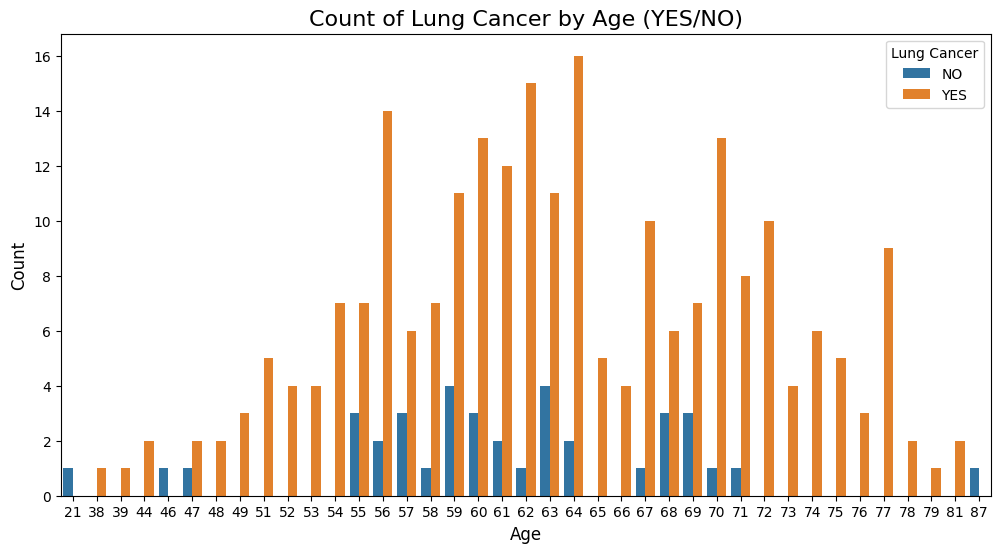

In [65]:
# plotting a Countplot for AGE vs LUNG_CANCER
plt.figure(figsize=(12, 6))
sns.countplot(x='AGE', hue='LUNG_CANCER', data=df)
plt.title('Count of Lung Cancer by Age (YES/NO)', fontsize=16)
plt.xlabel('Age', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.legend(title='Lung Cancer', labels=['NO', 'YES'])
plt.show()


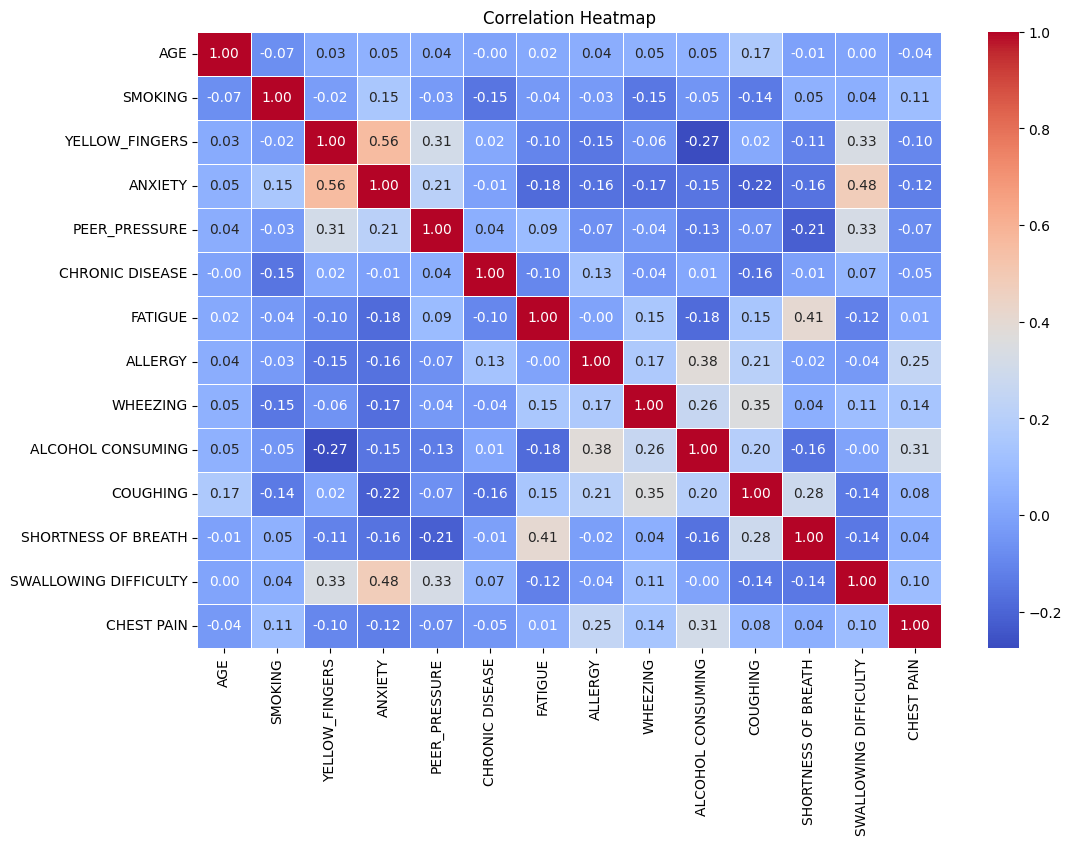

In [66]:
# Visualizing the  correlations between numeric features using a heatmap
correlation_matrix = df[numeric_columns].corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()

**LABEL ENCODING**

In [67]:
# Encode Categorical Features
label_encoder = LabelEncoder()

# Identify categorical columns
categorical_columns = ['GENDER', 'LUNG_CANCER']

for col in categorical_columns:
    df[col] = label_encoder.fit_transform(df[col])

print("\nDataset after Encoding:")
print(df.head())


Dataset after Encoding:
   GENDER  AGE  SMOKING  YELLOW_FINGERS  ANXIETY  PEER_PRESSURE  \
0       1   69        1               2        2              1   
1       1   74        2               1        1              1   
2       0   59        1               1        1              2   
3       1   63        2               2        2              1   
4       0   63        1               2        1              1   

   CHRONIC DISEASE  FATIGUE  ALLERGY  WHEEZING  ALCOHOL CONSUMING  COUGHING  \
0                1        2        1         2                  2         2   
1                2        2        2         1                  1         1   
2                1        2        1         2                  1         2   
3                1        1        1         1                  2         1   
4                1        1        1         2                  1         2   

   SHORTNESS OF BREATH  SWALLOWING DIFFICULTY  CHEST PAIN  LUNG_CANCER  
0                    2  

**ONE HOT ENCODING**

In [68]:
# 'PEER_PRESSURE' , ''YELLOW_FINGERS', GENDER , 'SMOKING' has been chosen to get dummies
df = pd.get_dummies(df, columns=['PEER_PRESSURE', 'YELLOW_FINGERS', 'GENDER', 'SMOKING'], drop_first=True)


In [69]:
# Features and Target
X = df.drop(columns=['LUNG_CANCER'])
y = df['LUNG_CANCER']

**TRAIN-TEST-SPLIT**

In [70]:
# Train-Test Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

**FEATURE SCALING**

In [71]:
# Scale the features using MinMax Scaler
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("Feature scaling using MinMaxScaler completed.")

Feature scaling using MinMaxScaler completed.


**FEATURE SELECTION**

In [72]:

#  correlation matrix
corr_matrix = pd.DataFrame(X_train_scaled, columns=X.columns).corr()
high_corr = set()

# to find highly correlated features
for i in range(len(corr_matrix.columns)):
    for j in range(i):
        if abs(corr_matrix.iloc[i, j]) > 0.4:  # set 0.4 as Correlation threshold
            colname = corr_matrix.columns[i]
            high_corr.add(colname)




In [73]:
# Drop highly correlated features
X_train_selected = pd.DataFrame(X_train_scaled, columns=X.columns).drop(columns=high_corr)
X_test_selected = pd.DataFrame(X_test_scaled, columns=X.columns).drop(columns=high_corr)

# Number of columns removed
num_columns_removed = len(high_corr)
print(f"Number of columns removed: {num_columns_removed}")


Number of columns removed: 5


**MODEL BUILDING AND EVALUATION**

**1.GAUSSIAN NAIVE BAYES**

In [74]:
# build an NB MODEL
nb_model = GaussianNB()
nb_model.fit(X_train_scaled, y_train)

# Prediction and classification report
y_pred_nb = nb_model.predict(X_test_scaled)

print("\nNaive Bayes Classifier")
print("Accuracy:", accuracy_score(y_test, y_pred_nb))
print("\nClassification Report:")
print(classification_report(y_test, y_pred_nb))



Naive Bayes Classifier
Accuracy: 0.9009009009009009

Classification Report:
              precision    recall  f1-score   support

           0       0.67      0.62      0.65        16
           1       0.94      0.95      0.94        95

    accuracy                           0.90       111
   macro avg       0.80      0.79      0.79       111
weighted avg       0.90      0.90      0.90       111



**2.GRAIDENT BOOSTING**

In [75]:
# Build a Gradient Boosting Model
gb_model = GradientBoostingClassifier(random_state=42)
gb_model.fit(X_train_scaled, y_train)

# # Prediction and classification report
y_pred_gb = gb_model.predict(X_test_scaled)

print("\nGradient Boosting Classifier")
print("Accuracy:", accuracy_score(y_test, y_pred_gb))
print("\nClassification Report:")
print(classification_report(y_test, y_pred_gb))



Gradient Boosting Classifier
Accuracy: 0.8828828828828829

Classification Report:
              precision    recall  f1-score   support

           0       0.64      0.44      0.52        16
           1       0.91      0.96      0.93        95

    accuracy                           0.88       111
   macro avg       0.77      0.70      0.73       111
weighted avg       0.87      0.88      0.87       111



**3.SUPPORT VECTOR MACHINE(SVM)**

In [76]:
# Build a SVM Model
svm_model = SVC(kernel='rbf', random_state=42)
svm_model.fit(X_train_scaled, y_train)

## Prediction and classification report
y_pred_svm = svm_model.predict(X_test_scaled)

print("\nSupport Vector Machine (SVM)")
print("Accuracy:", accuracy_score(y_test, y_pred_svm))

print("\nClassification Report:")
print(classification_report(y_test, y_pred_svm))



Support Vector Machine (SVM)
Accuracy: 0.8918918918918919

Classification Report:
              precision    recall  f1-score   support

           0       0.75      0.38      0.50        16
           1       0.90      0.98      0.94        95

    accuracy                           0.89       111
   macro avg       0.83      0.68      0.72       111
weighted avg       0.88      0.89      0.88       111



**4.XG BOOST**

In [77]:
# build a XGBoost Model
xg_model = xgb.XGBClassifier(random_state=42)
xg_model.fit(X_train_scaled, y_train)

# Prediction and classification report
y_pred_xg = xg_model.predict(X_test_scaled)

print("\nXGBoost Classifier")
print("Accuracy:", accuracy_score(y_test, y_pred_xg))
print("\nClassification Report:")
print(classification_report(y_test, y_pred_xg))



XGBoost Classifier
Accuracy: 0.8558558558558559

Classification Report:
              precision    recall  f1-score   support

           0       0.50      0.38      0.43        16
           1       0.90      0.94      0.92        95

    accuracy                           0.86       111
   macro avg       0.70      0.66      0.67       111
weighted avg       0.84      0.86      0.85       111



**5.DECISION TREE**

In [78]:
#Build a dt model
dt_model = DecisionTreeClassifier(random_state=42)  # Default DT
dt_model.fit(X_train_scaled, y_train)

#prediction of the model
y_pred = dt_model.predict(X_test_scaled)

# evaluation of the model
print("Decision Tree Classifier (Default Parameters):")
print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Decision Tree Classifier (Default Parameters):
Accuracy: 0.8559

Classification Report:
              precision    recall  f1-score   support

           0       0.50      0.44      0.47        16
           1       0.91      0.93      0.92        95

    accuracy                           0.86       111
   macro avg       0.70      0.68      0.69       111
weighted avg       0.85      0.86      0.85       111



**HYPERPARMETER TUNING**

**1.NAIVE BAYES**

Fitting 5 folds for each of 5 candidates, totalling 25 fits
Best Naive Bayes Test Accuracy: 0.9009

Classification Report:
              precision    recall  f1-score   support

           0       0.67      0.62      0.65        16
           1       0.94      0.95      0.94        95

    accuracy                           0.90       111
   macro avg       0.80      0.79      0.79       111
weighted avg       0.90      0.90      0.90       111



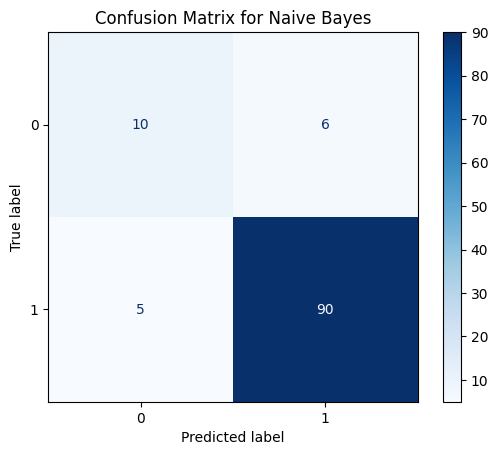

In [79]:
# Selecting the hyperparameter
nb_param_grid = {
    'var_smoothing': [1e-9, 1e-8, 1e-7, 1e-6, 1e-5]
}

# Using Grid Search
nb_grid_search = GridSearchCV(
    GaussianNB(),
    param_grid=nb_param_grid,
    cv=5,
    scoring='accuracy',
    verbose=1
)

# Fit the GridSearchCV
nb_grid_search.fit(X_train_scaled, y_train)

# Find the best model and evaluate
best_nb_model = nb_grid_search.best_estimator_
nb_accuracy = best_nb_model.score(X_test_scaled, y_test)
print(f"Best Naive Bayes Test Accuracy: {nb_accuracy:.4f}")

# Prediction and evaluation
y_pred_nb = best_nb_model.predict(X_test_scaled)

# Classification Report
print("\nClassification Report:")
print(classification_report(y_test, y_pred_nb, zero_division=1))

# Display of Confusion Matrix
cm = confusion_matrix(y_test, y_pred_nb)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=nb_grid_search.classes_)
disp.plot(cmap='Blues')
plt.title("Confusion Matrix for Naive Bayes")
plt.show()


**2.GRADIENT BOOSTING**

Fitting 5 folds for each of 20 candidates, totalling 100 fits
Best Gradient Boosting Test Accuracy: 0.8919

Classification Report:
              precision    recall  f1-score   support

           0       0.70      0.44      0.54        16
           1       0.91      0.97      0.94        95

    accuracy                           0.89       111
   macro avg       0.81      0.70      0.74       111
weighted avg       0.88      0.89      0.88       111



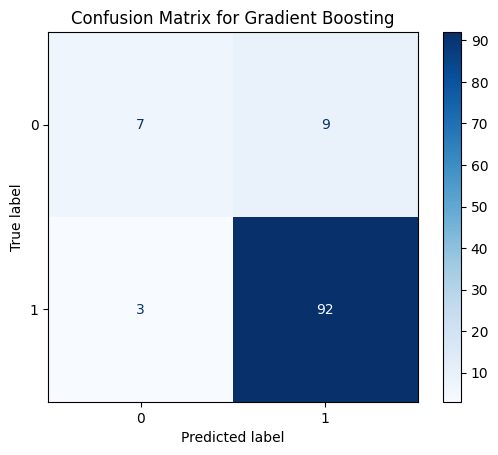

In [80]:
# selecting the hyperparameters for the model
gb_param_distributions = {
    'n_estimators': [50, 100, 150],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

#using RandomizedSearch
gb_random_search = RandomizedSearchCV(
    GradientBoostingClassifier(random_state=42),
    param_distributions=gb_param_distributions,
    n_iter=20,
    cv=5,
    scoring='accuracy',
    random_state=42,
    verbose=1
)

# Fit the RandomizedSearchCV
gb_random_search.fit(X_train_scaled, y_train)

# Finf the best model after evaluation
best_gb_model = gb_random_search.best_estimator_
gb_accuracy = best_gb_model.score(X_test_scaled, y_test)
print(f"Best Gradient Boosting Test Accuracy: {gb_accuracy:.4f}")

# Prediction and evaluation
y_pred_gb = best_gb_model.predict(X_test_scaled)

# Classification Report
print("\nClassification Report:")
print(classification_report(y_test, y_pred_gb, zero_division=1))

# display of confusion matrix
cm = confusion_matrix(y_test, y_pred_gb)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=gb_random_search.classes_)
disp.plot(cmap='Blues')
plt.title("Confusion Matrix for Gradient Boosting")
plt.show()

**3. SUPPORT MACHINE VECTOR(SVM)**

Fitting 5 folds for each of 1440 candidates, totalling 7200 fits
Best Parameters for SVM: {'C': 10, 'class_weight': None, 'degree': 4, 'gamma': 0.1, 'kernel': 'poly', 'max_iter': 1000, 'tol': 0.0001}
Tuned SVM Test Accuracy: 0.9189

Classification Report:
               precision    recall  f1-score   support

           0       0.68      0.81      0.74        16
           1       0.97      0.94      0.95        95

    accuracy                           0.92       111
   macro avg       0.83      0.87      0.85       111
weighted avg       0.93      0.92      0.92       111



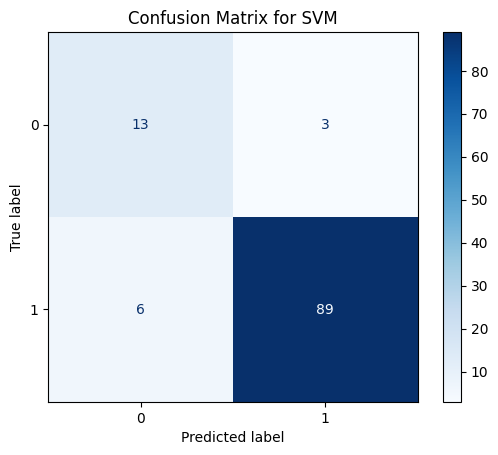

In [81]:
# defining the parameter grid
svm_param_grid = {
    'C': [0.1, 1, 10, 100],
    'kernel': ['rbf', 'poly'],
    'gamma': ['scale', 'auto', 0.01, 0.1, 1],
    'degree': [2, 3, 4],
    'class_weight': [None, 'balanced'],  # to Handle class imbalance
    'tol': [1e-4, 1e-3],
    'max_iter': [1000, 2000, -1]
}

# using GridSearchCV
svm_grid_search = GridSearchCV(
    estimator=SVC(probability=True),  # SVC with probability=True for ROC curves later
    param_grid=svm_param_grid,
    cv=5,  # 5-fold cross-validation
    scoring='accuracy',
    verbose=1
)

# fit the model using GridSearch
svm_grid_search.fit(X_train_scaled, y_train)

# find best parameters
print(f"Best Parameters for SVM: {svm_grid_search.best_params_}")

#for the best model
best_svm_model = svm_grid_search.best_estimator_

# Prediction of the model
y_pred_svm = best_svm_model.predict(X_test_scaled)

# Evaluation of the model
svm_accuracy = accuracy_score(y_test, y_pred_svm)
print(f"Tuned SVM Test Accuracy: {svm_accuracy:.4f}")
print("\nClassification Report:\n", classification_report(y_test, y_pred_svm, zero_division=1))

#confusion matrix
cm = confusion_matrix(y_test, y_pred_svm)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=svm_grid_search.classes_)
disp.plot(cmap='Blues')
plt.title("Confusion Matrix for SVM")
plt.show()


**4.XGB**

Best Parameters: {'max_depth': 3, 'learning_rate': 0.1, 'n_estimators': 50, 'objective': 'binary:logistic', 'eval_metric': 'logloss'}
Best Accuracy: 0.8918918918918919

Classification Report:
              precision    recall  f1-score   support

           0       0.64      0.56      0.60        16
           1       0.93      0.95      0.94        95

    accuracy                           0.89       111
   macro avg       0.79      0.75      0.77       111
weighted avg       0.89      0.89      0.89       111



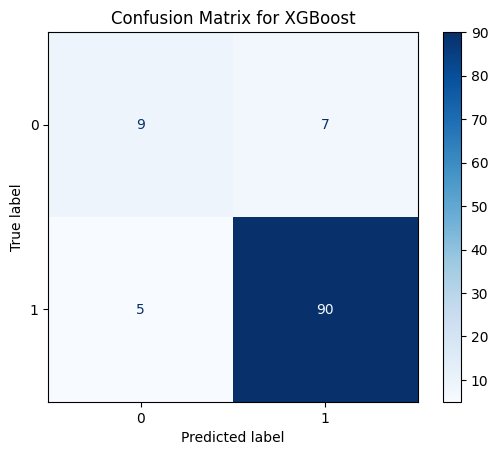

In [82]:
# Convert scaled data into DMatrix format for XGBoost
dtrain = xgb.DMatrix(X_train_scaled, label=y_train)
dtest = xgb.DMatrix(X_test_scaled, label=y_test)

#a hyperparamter tuning using three key params
param_grid = {
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2],
    'n_estimators': [50, 100, 200]
}

# to store the final results
results = []

# to perform manual grid search
for max_depth in param_grid['max_depth']:
    for learning_rate in param_grid['learning_rate']:
        for n_estimators in param_grid['n_estimators']:
            params = {
                'max_depth': max_depth,
                'learning_rate': learning_rate,
                'n_estimators': n_estimators,
                'objective': 'binary:logistic',
                'eval_metric': 'logloss'
            }

            # Training the model with selected parameters
            model = xgb.XGBClassifier(**params)
            model.fit(X_train_scaled, y_train)

            # Evaluation of the model
            y_pred_xg = model.predict(X_test_scaled)
            xgb_accuracy = accuracy_score(y_test, y_pred_xg)

            # Storing the final results
            results.append((params, xgb_accuracy))

# to select the best parameters that would give best accuracy
best_params, best_accuracy = max(results, key=lambda x: x[1])
print("Best Parameters:", best_params)
print("Best Accuracy:", best_accuracy)

# training the best model
best_model = xgb.XGBClassifier(**best_params)
best_model.fit(X_train_scaled, y_train)

# predicition and evaluation of the best model
y_pred_xg = best_model.predict(X_test_scaled)

# Classification Report
print("\nClassification Report:")
print(classification_report(y_test, y_pred_xg))

# display the confusion matrix
cm = confusion_matrix(y_test, y_pred_xg)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=np.unique(y))
disp.plot(cmap='Blues')
plt.title("Confusion Matrix for XGBoost")
plt.show()


**5.DECISION TREE**

Fitting 5 folds for each of 90 candidates, totalling 450 fits
Best Hyperparameters: {'criterion': 'entropy', 'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 5}

Decision Tree Classifier 
Accuracy: 0.8739

Classification Report:
              precision    recall  f1-score   support

           0       0.56      0.56      0.56        16
           1       0.93      0.93      0.93        95

    accuracy                           0.87       111
   macro avg       0.74      0.74      0.74       111
weighted avg       0.87      0.87      0.87       111



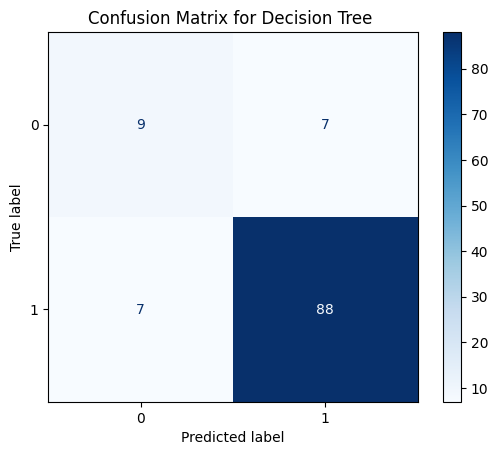

In [83]:
# Hyperparameters for decision tree
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [5, 10, 15, 20, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# using GridSearch
grid_search = GridSearchCV(
    estimator=DecisionTreeClassifier(random_state=42),
    param_grid=param_grid,
    cv=5,  # 5-fold cross-validation
    scoring='accuracy',
    verbose=1,
    n_jobs=-1
)

# Fit the model for tuning
grid_search.fit(X_train_scaled, y_train)

# best parameters
print("Best Hyperparameters:", grid_search.best_params_)

# training the best model
best_tree_model = grid_search.best_estimator_

#prediction on the model
y_pred = best_tree_model.predict(X_test_scaled)

# evaluation of the model
print("\nDecision Tree Classifier ")
print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=best_tree_model.classes_)
disp.plot(cmap='Blues')
plt.title("Confusion Matrix for Decision Tree ")
plt.show()

**APPLYING SMOTE**

In [84]:
# Apply SMOTE to the scaled training data
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_scaled, y_train)

print("SMOTE applied.")


SMOTE applied.


**1.NAIVE BAYES WITH SMOTE**

In [87]:
# build a  Naive Bayes model for smote
nb_model = GaussianNB()
nb_model.fit(X_train_resampled, y_train_resampled)

#predicition of the model
y_pred = nb_model.predict(X_test_scaled)

# Evaluation  of the model
print("Naive Bayes Classifier:")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:")
print(classification_report(y_test, y_pred))

Naive Bayes Classifier:
Accuracy: 0.8738738738738738
Classification Report:
              precision    recall  f1-score   support

           0       0.55      0.69      0.61        16
           1       0.95      0.91      0.92        95

    accuracy                           0.87       111
   macro avg       0.75      0.80      0.77       111
weighted avg       0.89      0.87      0.88       111



**2.GRADIENT BOOSTING WITH SMOTE**

In [88]:
# build a Gradient Boosting model for smote
gb_model = GradientBoostingClassifier()
gb_model.fit(X_train_resampled, y_train_resampled)

#predicition of the model
y_pred = gb_model.predict(X_test_scaled)

# Evaluation of the model
print("Gradient Boosting Classifier:")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:")
print(classification_report(y_test, y_pred))

Gradient Boosting Classifier:
Accuracy: 0.8648648648648649
Classification Report:
              precision    recall  f1-score   support

           0       0.54      0.44      0.48        16
           1       0.91      0.94      0.92        95

    accuracy                           0.86       111
   macro avg       0.72      0.69      0.70       111
weighted avg       0.85      0.86      0.86       111



**3.SVM WITH SMOTE**

In [89]:
# Build a svm model for smote
svm_model = SVC()
svm_model.fit(X_train_resampled, y_train_resampled)

#predicition of the model
y_pred = svm_model.predict(X_test_scaled)

# Evaluation of the model
print("Support Vector Machine Classifier:")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:")
print(classification_report(y_test, y_pred))

Support Vector Machine Classifier:
Accuracy: 0.918918918918919
Classification Report:
              precision    recall  f1-score   support

           0       0.71      0.75      0.73        16
           1       0.96      0.95      0.95        95

    accuracy                           0.92       111
   macro avg       0.83      0.85      0.84       111
weighted avg       0.92      0.92      0.92       111



**4.XGB WITH SMOTE**

In [90]:
# Build a xgb model for smote
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')
xgb_model.fit(X_train_resampled, y_train_resampled)

#predicition of the model
y_pred = xgb_model.predict(X_test_scaled)

# Evaluation of the model
print("XGBoost Classifier:")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:")
print(classification_report(y_test, y_pred))


XGBoost Classifier:
Accuracy: 0.8468468468468469
Classification Report:
              precision    recall  f1-score   support

           0       0.46      0.38      0.41        16
           1       0.90      0.93      0.91        95

    accuracy                           0.85       111
   macro avg       0.68      0.65      0.66       111
weighted avg       0.84      0.85      0.84       111



**5.DECISION TREE WITH SMOTE**

In [91]:
#Build an DT model after SMOTE
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train_resampled, y_train_resampled)

#Prediction of the model
y_pred = dt_model.predict(X_test_scaled)

# Model evaluation
print("Decision Tree Classifier:")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Decision Tree Classifier:
Accuracy: 0.8378378378378378

Classification Report:
              precision    recall  f1-score   support

           0       0.44      0.44      0.44        16
           1       0.91      0.91      0.91        95

    accuracy                           0.84       111
   macro avg       0.67      0.67      0.67       111
weighted avg       0.84      0.84      0.84       111



**BEST FEATURE CONTRIBUTION BEFORE SMOTE**

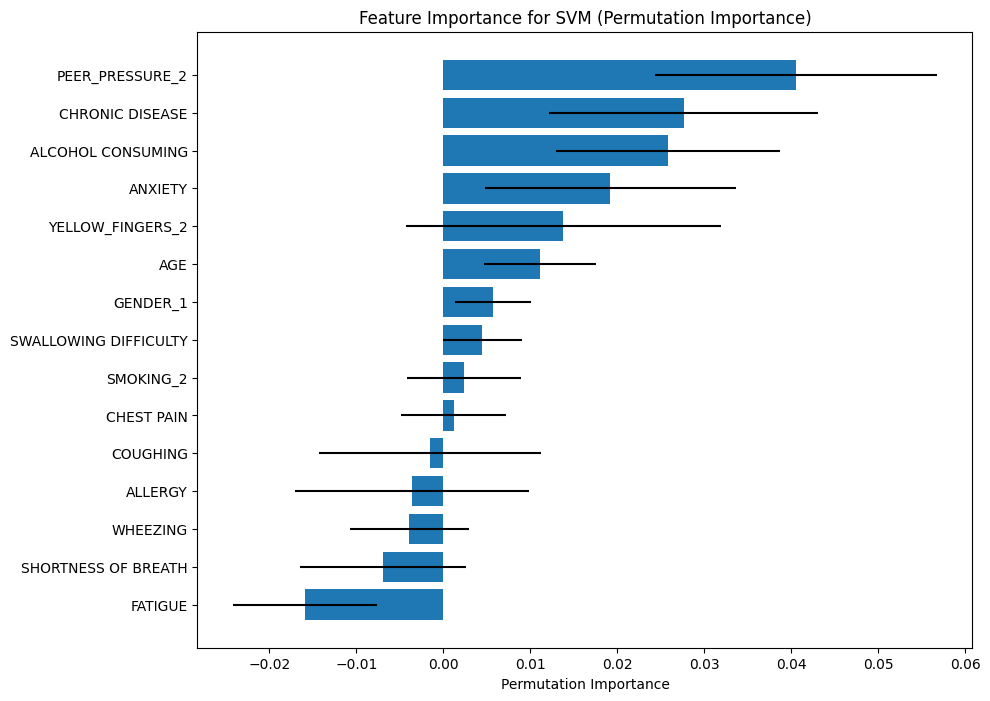

                  Feature  Importance
11        PEER_PRESSURE_2    0.040541
2         CHRONIC DISEASE    0.027628
6       ALCOHOL CONSUMING    0.025826
1                 ANXIETY    0.019219
12       YELLOW_FINGERS_2    0.013814
0                     AGE    0.011111
13               GENDER_1    0.005706
9   SWALLOWING DIFFICULTY    0.004505
14              SMOKING_2    0.002402
10             CHEST PAIN    0.001201
7                COUGHING   -0.001502
4                 ALLERGY   -0.003604
5                WHEEZING   -0.003904
8     SHORTNESS OF BREATH   -0.006907
3                 FATIGUE   -0.015916


In [92]:
# Calculate permutation importance
perm_importance = permutation_importance(best_svm_model, X_test_scaled, y_test, n_repeats=30, random_state=42)

# Sorting the importance
sorted_idx = perm_importance.importances_mean.argsort()

# Ploting feature importance
plt.figure(figsize=(10, 8))
plt.barh(np.array(X_train.columns)[sorted_idx], perm_importance.importances_mean[sorted_idx], xerr=perm_importance.importances_std[sorted_idx])
plt.xlabel("Permutation Importance")
plt.title("Feature Importance for SVM (Permutation Importance)")
plt.show()
# Display Feature Importance
feature_importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': perm_importance.importances_mean
}).sort_values(by='Importance', ascending=False)

print(feature_importance_df)



**BEST FEATURE CONTRIBUTION AFTER SMOTE**

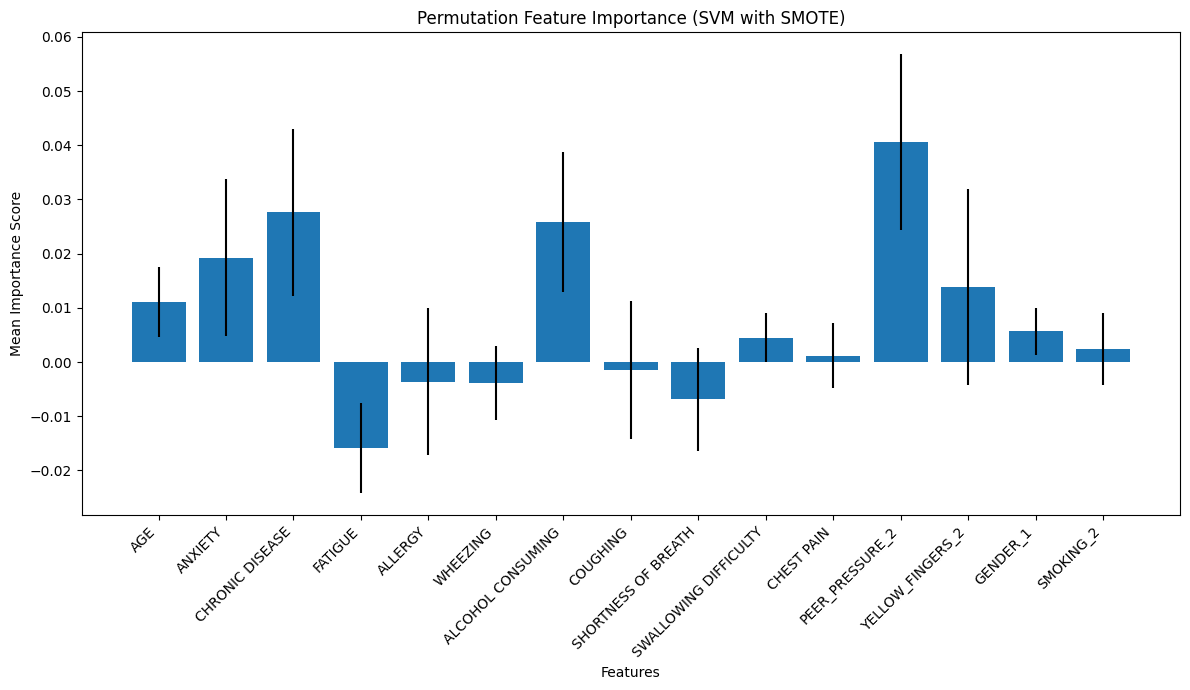


Feature Importance
                  Feature  Importance
11        PEER_PRESSURE_2    0.040541
2         CHRONIC DISEASE    0.027628
6       ALCOHOL CONSUMING    0.025826
1                 ANXIETY    0.019219
12       YELLOW_FINGERS_2    0.013814
0                     AGE    0.011111
13               GENDER_1    0.005706
9   SWALLOWING DIFFICULTY    0.004505
14              SMOKING_2    0.002402
10             CHEST PAIN    0.001201
7                COUGHING   -0.001502
4                 ALLERGY   -0.003604
5                WHEEZING   -0.003904
8     SHORTNESS OF BREATH   -0.006907
3                 FATIGUE   -0.015916


In [93]:
# plot feature importances
plt.figure(figsize=(12, 7))
plt.bar(range(X_train_resampled.shape[1]), perm_importance.importances_mean, yerr=perm_importance.importances_std)
plt.xticks(range(X_train_resampled.shape[1]), X.columns, rotation=45, ha='right')
plt.title("Permutation Feature Importance (SVM with SMOTE)")
plt.ylabel("Mean Importance Score")
plt.xlabel("Features")
plt.tight_layout()
plt.show()

# display feature importance
feature_importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': perm_importance.importances_mean
}).sort_values(by='Importance', ascending=False)

print("\nFeature Importance")
print(feature_importance_df)
